# 1 - Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Malvin Subahri 

Batch : FTDS - 012

Dataset : Meat Freshness Image Dataset

Objective : Membuat model untuk mengklasifikasi apakah suatu daging fresh atau tidak

Problem Statement : Bagaimana bisa kita mendeteksi apakah suatu daging fresh atau tidak ?

# 2 - Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 7.0 MB/s 
     |████████████████████████████████| 9.8 MB 37.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import sys
import os
import pathlib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.layers import GlobalAveragePooling2D
# from sklearn.model_selection import train_test_split
# from feature_engine.outliers import Winsorizer
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, accuracy_score
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from tensorflow import keras
import pickle
import warnings
warnings.filterwarnings ('ignore')
%matplotlib inline

# 3 - Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [3]:
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Masuk folder "p2m2"
% cd /content/gdrive/MyDrive/p2m2

/content/gdrive/MyDrive/p2m2


In [5]:
# Melihat isi folder p2m2
! ls

meat_freshness	meat_freshness_inf  model_ft


# 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [6]:
import os
for dirpath, dirnames, filenames in os.walk ('meat_freshness'):
  print (f"Ada {len(dirnames)} folder dan ada {len(filenames)} file di dalam {dirpath}")

Ada 3 folder dan ada 0 file di dalam meat_freshness
Ada 3 folder dan ada 0 file di dalam meat_freshness/train
Ada 0 folder dan ada 540 file di dalam meat_freshness/train/fresh
Ada 0 folder dan ada 409 file di dalam meat_freshness/train/spoiled
Ada 0 folder dan ada 505 file di dalam meat_freshness/train/half
Ada 3 folder dan ada 0 file di dalam meat_freshness/test
Ada 0 folder dan ada 114 file di dalam meat_freshness/test/spoiled
Ada 0 folder dan ada 178 file di dalam meat_freshness/test/fresh
Ada 0 folder dan ada 159 file di dalam meat_freshness/test/half
Ada 3 folder dan ada 0 file di dalam meat_freshness/valid
Ada 0 folder dan ada 102 file di dalam meat_freshness/valid/spoiled
Ada 0 folder dan ada 135 file di dalam meat_freshness/valid/fresh
Ada 0 folder dan ada 126 file di dalam meat_freshness/valid/half


In [7]:
data_dir = pathlib.Path('meat_freshness/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['fresh' 'half' 'spoiled']


Terdapat 3 class pada data train yaitu fresh, half, dan spoiled

In [8]:
# View Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow (img)
  plt.title (target_class)
  plt.axis ("off")

  print (f"Image Shape : {img.shape}")
  return img

Image Shape : (416, 416, 3)


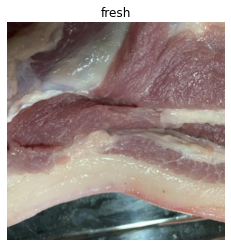

In [9]:
img  = view_random_image (target_dir = 'meat_freshness/train/',
                          target_class = 'fresh')

Dari gambar di atas kita bisa melihat, bahwa daging yang fresh memiliki warna kemerahan tidak pucat dan terdapat serat dari daging yang berwarna putih cerah

Gambar didominasi dengan warna merah dan putih terang

Image Shape : (416, 416, 3)


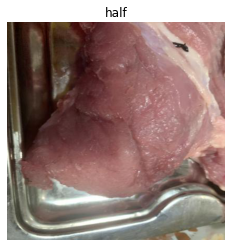

In [10]:
img  = view_random_image (target_dir = 'meat_freshness/train/',
                          target_class = 'half')

Dari gambar di atas kita bisa melihat, bahwa daging yang half memiliki warna kemerahan sedikit pucat dan terdapat serat dari daging yang berwarna putih sedikit gelap

Gambar didominasi dengan warna merah dan putih sedikit gelap

Image Shape : (416, 416, 3)


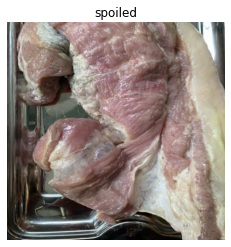

In [11]:
img  = view_random_image (target_dir = 'meat_freshness/train/',
                          target_class = 'spoiled')

Dari gambar di atas kita bisa melihat, bahwa daging yang spoiled memiliki warna merah pucat dan terdapat serat dari daging yang berwarna putih pucat bahkan terdapat warna hitam pada daging yang

Gambar didominasi dengan warna merah dan putih pucat serta sedikit warna hitam

Dari gambar di atas kita bisa melihat, bahwa daging yang fresh memiliki warna yang merah dan serat daging berwarna putih, semakin berkurang tingkat kesegarannya maka warna merahnya akan semakin pucat bahkan disertai dengan sedikit warna hitam

In [12]:
print('Type of the image : ',type(img))
print('Shape of the image : {}'.format(img.shape))
print('Height of the image {}'.format(img.shape[0]))
print('Width of the image {}'.format(img.shape[1]))
print('Dimension of the Image {}'.format(img.ndim))

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (416, 416, 3)
Height of the image 416
Width of the image 416
Dimension of the Image 3


Dari image shape kita bisa melihat bahwa gambar tersebut memiliki lebar dan tinggi sebesar 416 

Type image adalah np.array berdimensi 3 yang berarti gambar tersebut terdiri dari 3 layer matrix artinya gambar tersebut memiliki spectrum warna RGB


In [13]:
 print('Image size {}'.format(img.size))
 print('Maximum RGB value in this image {}'.format(img.max()))
 print('Minimum RGB value in this image {}'.format(img.min())) 

Image size 519168
Maximum RGB value in this image 255
Minimum RGB value in this image 0


Image size sebesesar 519168 didapat dari ukuran shape yaitu 416 x 416 x 3

Nilai maksimal RGB value pada gambar sebesar 255

Nilai minimal RGB value pada gambar sebesar 0

# 5 - Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.



In [14]:
# Locate Data

train_dir = 'meat_freshness/train'
test_dir = 'meat_freshness/test'
valid_dir = 'meat_freshness/valid'

## Model

In [15]:
# Scaling Data

train_datagen = ImageDataGenerator(rescale=1 / 255.0)
test_datagen = ImageDataGenerator(rescale=1 / 255.0)
valid_datagen = ImageDataGenerator(rescale=1 / 255.0)

Gambar terdiri dari sebuah pixel dengan rentang angka dari 0-255 namun sebagai syarat untuk memasukan data ke dalam neural network yaitu datanya harus diantara 0-1, maka dari itu kita perlu melakukan scaling data agar nilai pixel dari gambar berikisar antara 0-1

In [16]:
# Gunakan Object Datagen

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=16,
                                               target_size=(200,200),
                                               class_mode='categorical',
                                               seed=46)

test_data = train_datagen.flow_from_directory(test_dir,
                                              batch_size=16,
                                              target_size=(200,200),
                                              class_mode='categorical',
                                              seed=46)

valid_data = train_datagen.flow_from_directory(valid_dir,
                                               batch_size=16,
                                               target_size=(200,200),
                                               class_mode='categorical',
                                               seed=46,
                                               shuffle=False)

Found 1452 images belonging to 3 classes.
Found 451 images belonging to 3 classes.
Found 363 images belonging to 3 classes.


Batch data yang digunakan adalah 16

Lalu untuk mempercepat proses training gambar kita resize ke ukuran 200x200 

Class_mode yang digunakan adalah catergorical karena data kita 2d

Seed adalah nilai bebas untuk random seed

## Model Improvement

In [17]:
# Augmented Object

train_datagen_augmented = ImageDataGenerator(rescale = 1 / 255.0,
                                             zoom_range = 0.1,
                                             brightness_range = [1,1.7])

Perlu dilakukan rescale untuk mengubah nilai pixel dari gambar menjadi range 0-1

Lalu kita coba zoom gambarnya agar lebih jelas terlihat antara daging dan seratnya

Lalu brightness gambarnya dicoba diterangkan agar lebih terlihat perbedaan warna merah daging dan putih serat

In [18]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   batch_size=16,
                                                                   target_size=(200,200),
                                                                   class_mode='categorical',
                                                                   seed=46)

Found 1452 images belonging to 3 classes.


(-0.5, 199.5, 199.5, -0.5)

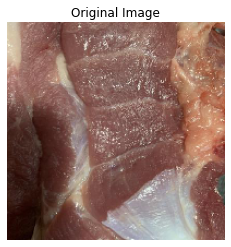

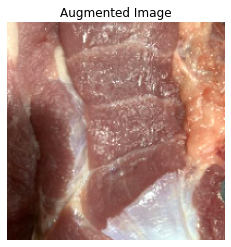

In [19]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()
random_number = random.randint(0, 5)
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)

Contoh hasil image yang sebelum diaugmentasi dan sesudah diaugmentasi

Pada image setelah diaugmentasi, gambar lebih zoom dan lebih terang

# 6 - Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

## Model

In [20]:
# Define Model

model = Sequential ()

model.add(Conv2D(128, 3, activation='relu', input_shape=(200,200,3)))
model.add(MaxPool2D(2))

model.add(Conv2D(256, 3, activation='relu'))
model.add(MaxPool2D(2))

# Flattened 
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Model Compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary ()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 256)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 589824)            0         
                                                                 
 dense (Dense)               (None, 64)                3

Pada model ini kita mencoba melakukan feature extraction dengan 2 Convolution Layer 

Pada Convolution Layer ke-1 terdapat 1 layer convolusi dengan 128 filters ukuran 3x3 dan terdapat 1 layer MaxPooling

Pada Convolution Layer ke-2 terdapat 1 layer convolusi dengan 256 filters ukuran 3x3 dan terdapat 1 layer MaxPooling

Fungsi dari MaxPooling untuk mereduksi dimensi agar kompleksitas dari data berkurang, 

Setelah itu kita lakukan Flatten agar data bisa dimasukkan ke dalam Fully Connected Layer

Pada Fully Connected Layer, kita menggunakan 1 hidden layer dengan 64 neuron dan untuk output layer kita menggunakan activation function softmax dengan nilai 3 karena kita ingin mengklasifikasi kelas multi-class

Dan untuk loss kita menggunakan categorical_clossentropy karena kita ingin mengklasifikasi kelas multi_class

## Model Improvement With Transfer Learning

In [21]:
base_model = ResNet50V2(input_shape=(200,200,3),
                        include_top=False, # False karena kita tidak butuh output layer
                        weights="imagenet") # Kita mau pakai weights dari hasil training imagenet 

# freeze model
base_model.trainable = False 

94683136/94668760 [==============================] - 1s 0us/step


Untuk model transfer Learning kita memilih RestNet50V2 karena ukuran dari model tersebut tidak terlalu besar dibandingkan dengan VGG16

Training speed dengan model RestNet50V2 juga cukup cepat dengan accuracy yang cukup tinggi

Sumber: https://keras.io/api/applications/#usage-examples-for-image-classification-models

Kita ambil pretrained model yaitu RestNet50V2 dengan input shape yaitu gambar kita tadi, lalu karena kita tidak perlu output layer maka dari itu include_top = False, dan weights yang kita mau adalah weights dari hasil training imagenet maka dari itu weights='imagenet', terahir kita freeze model karena kita tidak mau train ulang model ini

## Model Fine Tuning 1

In [22]:
# Define Model

model_ft = Sequential ()
model_ft.add(base_model)
model_ft.add(GlobalAveragePooling2D())
model_ft.add(Dense(20, activation='relu'))
model_ft.add(Dense(3, activation='softmax'))

# model compile
model_ft.compile(loss='categorical_crossentropy',
                 optimizer='adamax',
                 metrics=['accuracy'])

model_ft.summary ()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 20)                40980     
                                                                 
 dense_3 (Dense)             (None, 3)                 63        
                                                                 
Total params: 23,605,843
Trainable params: 41,043
Non-trainable params: 23,564,800
_________________________________________________________________


Untuk Model Improvement, kita menggunakan RestNet50V2 sebagai pretrained model

Setelah itu kita lakukan GlobalAveragePooling2D untuk mereduksi dimensi 

Setelah itu kita coba tambahkan 1 hidden layer dengan 20 neuron dan untuk output layer kita menggunakan activation function softmax dengan nilai 3 karena kita ingin mengklasifikasi kelas multi-class

Untuk loss kita menggunakan categorical_clossentropy karena kita ingin mengklasifikasi kelas multi_class

Untuk optimizer kita coba ganti dari yang sebelumnya menggunakan adam menjadi adamax

## Model Fine Tuning 2

In [23]:
# Define Model

model_ft2 = Sequential ()
model_ft2.add(base_model)
model_ft2.add(GlobalAveragePooling2D())
model_ft2.add(Dropout(0.1))
model_ft2.add(Dense(32, activation='relu'))
model_ft2.add(Dense(3, activation='softmax'))

# model compile
model_ft2.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

Untuk Model Improvement, kita menggunakan RestNet50V2 sebagai pretrained model

Setelah itu kita lakukan GlobalAveragePooling2D untuk mereduksi dimensi 

Lalu pada model sebelumnya kita tahu bahwa model overfit maka dari itu kita coba untuk menerapkan dropout untuk mengatasi overfitting

Setelah itu kita coba tambahkan 1 hidden layer dengan 32 neuron dan untuk output layer kita menggunakan activation function softmax dengan nilai 3 karena kita ingin mengklasifikasi kelas multi-class

Untuk loss kita menggunakan categorical_clossentropy karena kita ingin mengklasifikasi kelas multi_class

Untuk optimizer kita coba ganti dari yang sebelumnya menggunakan adam menjadi rmsprop

## Callbacks


In [24]:
# EarlyStopping Callbacks

earlystopping = tf.keras.callbacks.EarlyStopping (monitor='accuracy', patience=4, restore_best_weights=True)

In [25]:
path = '/content/drive/MyDrive/checkpointcallbacks'
modelcheckpoint = tf.keras.callbacks.ModelCheckpoint (filepath=path, monitor='accuracy', save_best_only=True,
                                                      save_weights_only=True, save_freq=455)

In [26]:
# ReduceLROnPlateau

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor=0.1, patience=2)

# 7 - Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## Model

In [27]:
# Train Model

history1 = model.fit(train_data,
                     epochs=30,
                     validation_data=valid_data,
                     callbacks = [earlystopping, modelcheckpoint, reduce_lr])

Epoch 1/30
91/91 [==============================] - 347s 4s/step - loss: 1.5518 - accuracy: 0.4731 - val_loss: 0.8530 - val_accuracy: 0.6253 - lr: 0.0010
Epoch 2/30
91/91 [==============================] - 11s 118ms/step - loss: 0.6050 - accuracy: 0.7521 - val_loss: 0.9251 - val_accuracy: 0.6584 - lr: 0.0010
Epoch 3/30
91/91 [==============================] - 11s 118ms/step - loss: 0.3223 - accuracy: 0.8815 - val_loss: 0.8791 - val_accuracy: 0.5978 - lr: 0.0010
Epoch 4/30
91/91 [==============================] - 11s 118ms/step - loss: 0.1269 - accuracy: 0.9580 - val_loss: 0.9711 - val_accuracy: 0.6942 - lr: 0.0010
Epoch 5/30
91/91 [==============================] - 12s 135ms/step - loss: 0.0473 - accuracy: 0.9869 - val_loss: 1.0949 - val_accuracy: 0.6529 - lr: 0.0010
Epoch 6/30
91/91 [==============================] - 11s 118ms/step - loss: 0.0282 - accuracy: 0.9931 - val_loss: 1.1614 - val_accuracy: 0.6722 - lr: 0.0010
Epoch 7/30
91/91 [==============================] - 11s 122ms/step

## Model Fine Tuning 1

In [28]:
# Train Model

history2 = model_ft.fit(train_data_augmented,
                        epochs=30,
                        validation_data=valid_data,
                        callbacks = [earlystopping, modelcheckpoint, reduce_lr])

Epoch 1/30
91/91 [==============================] - 30s 289ms/step - loss: 0.7091 - accuracy: 0.6825 - val_loss: 0.5755 - val_accuracy: 0.7218 - lr: 0.0010
Epoch 2/30
91/91 [==============================] - 25s 271ms/step - loss: 0.4145 - accuracy: 0.8409 - val_loss: 0.5574 - val_accuracy: 0.7135 - lr: 0.0010
Epoch 3/30
91/91 [==============================] - 25s 274ms/step - loss: 0.3224 - accuracy: 0.8857 - val_loss: 0.4309 - val_accuracy: 0.8127 - lr: 0.0010
Epoch 4/30
91/91 [==============================] - 25s 274ms/step - loss: 0.2745 - accuracy: 0.9022 - val_loss: 0.4724 - val_accuracy: 0.7713 - lr: 0.0010
Epoch 5/30
91/91 [==============================] - 25s 274ms/step - loss: 0.2326 - accuracy: 0.9229 - val_loss: 0.4092 - val_accuracy: 0.8237 - lr: 0.0010
Epoch 6/30
91/91 [==============================] - 25s 274ms/step - loss: 0.2077 - accuracy: 0.9353 - val_loss: 0.3954 - val_accuracy: 0.8320 - lr: 0.0010
Epoch 7/30
91/91 [==============================] - 25s 276ms/st

## Model Fine Tuning 2

In [29]:
# Train Model

history3 = model_ft2.fit(train_data_augmented,
                         epochs=30,
                         validation_data=valid_data,
                         callbacks = [earlystopping, modelcheckpoint, reduce_lr])

Epoch 1/30
91/91 [==============================] - 31s 293ms/step - loss: 0.5400 - accuracy: 0.7727 - val_loss: 0.3553 - val_accuracy: 0.8678 - lr: 0.0010
Epoch 2/30
91/91 [==============================] - 26s 280ms/step - loss: 0.2849 - accuracy: 0.8774 - val_loss: 0.4223 - val_accuracy: 0.7934 - lr: 0.0010
Epoch 3/30
91/91 [==============================] - 25s 277ms/step - loss: 0.1947 - accuracy: 0.9242 - val_loss: 0.3176 - val_accuracy: 0.8871 - lr: 0.0010
Epoch 4/30
91/91 [==============================] - 26s 282ms/step - loss: 0.1431 - accuracy: 0.9477 - val_loss: 0.4284 - val_accuracy: 0.8430 - lr: 0.0010
Epoch 5/30
91/91 [==============================] - 25s 279ms/step - loss: 0.1247 - accuracy: 0.9525 - val_loss: 0.3728 - val_accuracy: 0.8623 - lr: 0.0010
Epoch 6/30
91/91 [==============================] - 26s 282ms/step - loss: 0.1077 - accuracy: 0.9594 - val_loss: 0.5180 - val_accuracy: 0.8292 - lr: 0.0010
Epoch 7/30
91/91 [==============================] - 26s 282ms/st

# 8 - Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

## Model

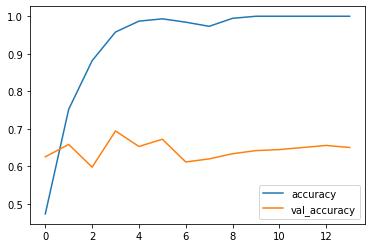

In [30]:
metrics = pd.DataFrame (history1.history)
metrics [['accuracy', 'val_accuracy']].plot()

Pada grafik metrics accuracy bisa dilihat model overfit karena hasil accuracy jauh lebih tinggi dibandingkan dengan val_accuracy

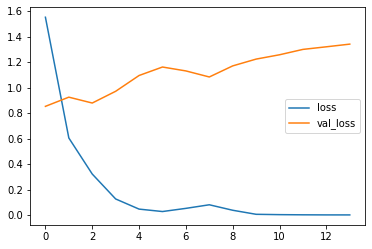

In [31]:
metrics = pd.DataFrame (history1.history)
metrics [['loss', 'val_loss']].plot()

Pada grafik metrics loss bisa dilihati model overfit karena hasil loss rendah dan val_loss tinggi 

Selain itu seharusnya val_loss semakin lama semakin turun namun di grafik ini menunjukan val_loss semakin lama semakin naik bahkan melebihi angka 1 artinya lossnya semakin lama semakin besar

In [44]:
res_t = model.predict (train_data)
y_train = train_data.classes
res_t = res_t.argmax(axis=1)
print(classification_report(y_train,res_t))

              precision    recall  f1-score   support

           0       0.39      0.39      0.39       540
           1       0.34      0.35      0.34       504
           2       0.26      0.26      0.26       408

    accuracy                           0.34      1452
   macro avg       0.33      0.33      0.33      1452
weighted avg       0.34      0.34      0.34      1452



In [32]:
res = model.predict (test_data)
y_test = test_data.classes
res = res.argmax(axis=1)
print(classification_report(y_test,res))

              precision    recall  f1-score   support

           0       0.42      0.37      0.39       178
           1       0.32      0.35      0.33       159
           2       0.24      0.25      0.25       114

    accuracy                           0.33       451
   macro avg       0.33      0.32      0.32       451
weighted avg       0.34      0.33      0.33       451



Jika label 0 adalah fresh, label 1 adalah half, dan label 2 adalah spoiled

Dari hasil classification report bisa dilihat bahwa accuracy sebesar 33% artinya kemampuan model memprediksi secara keselurahan sebesar 33% 

Pada model ini kemampuan memprediksi gambar yang paling baik adalah saat memprediksi label 0 dengan recall 0.37 artinya sebanyak 37% gambar diprediksi dengan benar 

Pada model ini paling sulit memprediksi gambar dengan label 2 dapat dilihat dari recallnya yang paling kecil di antara label yang lain

Pada model ini performasi test tidak memuaskan karena hasil trainingnya juga tidak bagus, maka dari itu hasil test juga tidak bagus 

Model bisa dikatakan underfit karena hasil train tidak bagus dan hasil test tidak bagus

Model underfit mungkin dikarenakan data pada train-set kurang sehingga model kurang dalam mempelejari data, bisa juga belum menemukan parameter yang pas

## Model Fine Tuning 1

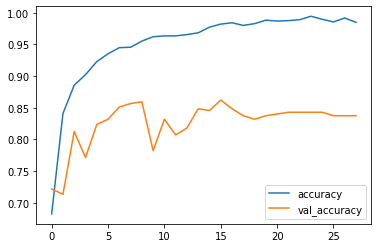

In [33]:
metrics = pd.DataFrame (history2.history)
metrics [['accuracy', 'val_accuracy']].plot()

Pada grafik metrics accuracy ini, terlihat model sudah lebih baik dari model sebelumnya. Namun model masi bisa dikatakan overfit karena val_accuracy masi jauh lebih rendah dari hasil accuracy meskipun hasil val accuracy sudah cukup baik di kisaran 0.80

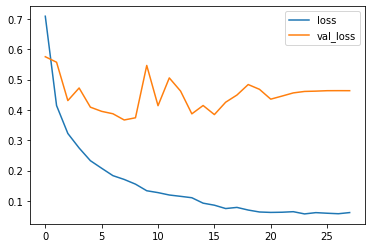

In [34]:
metrics = pd.DataFrame (history2.history)
metrics [['loss', 'val_loss']].plot()

Pada grafik metrics loss, terlihat model sudah lebih baik karena val_loss sudah turun di bawah angka 1 dibandingkan model sebelumnya val_lossnya meningkat melebihi angka 1, namun model masi dikatergorikan overfit karena hasil dari val_loss masih berbeda jauh dengan hasil loss

In [46]:
res_t = model_ft.predict (train_data_augmented)
y_train = train_data_augmented.classes
res_t = res_t.argmax(axis=1)
print(classification_report(y_train,res_t))

              precision    recall  f1-score   support

           0       0.37      0.37      0.37       540
           1       0.36      0.36      0.36       504
           2       0.26      0.26      0.26       408

    accuracy                           0.34      1452
   macro avg       0.33      0.33      0.33      1452
weighted avg       0.34      0.34      0.34      1452



In [35]:
res = model_ft.predict (test_data)
y_test = test_data.classes
res = res.argmax(axis=1)
print(classification_report(y_test,res))

              precision    recall  f1-score   support

           0       0.40      0.42      0.41       178
           1       0.34      0.32      0.33       159
           2       0.30      0.31      0.31       114

    accuracy                           0.36       451
   macro avg       0.35      0.35      0.35       451
weighted avg       0.36      0.36      0.36       451



Jika label 0 adalah fresh, label 1 adalah half, dan label 2 adalah spoiled

Dari hasil classification report bisa dilihat bahwa accuracy sebesar 36% artinya kemampuan model memprediksi secara keselurahan sebesar 36% 

pada model ini kemampuan memprediksi gambar yang paling baik adalah saat memprediksi label 0 dengan recall 0.42 artinya sebanyak 42% gambar diprediksi dengan benar

Pada model ini paling sulit memprediksi gambar dengan label 2 dapat dilihat dari recallnya yang paling kecil di antara label yang lain

Pada model ini performasi test tidak memuaskan karena hasil trainingnya juga tidak bagus, maka dari itu hasil test juga tidak bagus 

Model bisa dikatakan underfit karena hasil train tidak bagus dan hasil test tidak bagus

Model underfit mungkin dikarenakan data pada train-set kurang sehingga model kurang dalam mempelejari data, bisa juga belum menemukan parameter yang pas


## Model Fine Tuning 2

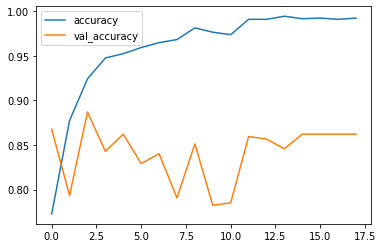

In [36]:
metrics = pd.DataFrame (history3.history)
metrics [['accuracy', 'val_accuracy']].plot()

Pada grafik metrics accuracy ini, terlihat accuracy model semakin meningkat dari model sebelumnya. Namun model masi bisa dikatakan overfit karena val_accuracy masi jauh lebih rendah dari hasil accuracy meskipun hasil val accuracy sudah cukup baik di kisaran 0.85

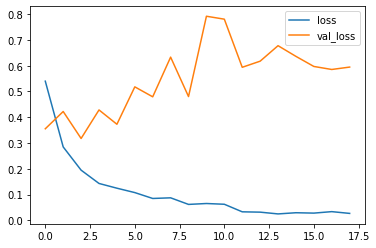

In [37]:
metrics = pd.DataFrame (history3.history)
metrics [['loss', 'val_loss']].plot()

Pada grafik metrics loss, terlihat model tidak lebih bagus dari model sebelumnya karena val_loss yang seharusnya menurun namun kenyaataannya naik. Model juga masi dikatergorikan overfit karena hasil dari val_loss masih berbeda jauh dengan hasil loss

In [47]:
res_t = model_ft2.predict (train_data_augmented)
y_train = train_data_augmented.classes
res_t = res_t.argmax(axis=1)
print(classification_report(y_train,res_t))

              precision    recall  f1-score   support

           0       0.36      0.37      0.36       540
           1       0.35      0.35      0.35       504
           2       0.27      0.27      0.27       408

    accuracy                           0.33      1452
   macro avg       0.33      0.33      0.33      1452
weighted avg       0.33      0.33      0.33      1452



In [38]:
res = model_ft2.predict (test_data)
y_test = test_data.classes
res = res.argmax(axis=1)
print(classification_report(y_test,res))

              precision    recall  f1-score   support

           0       0.41      0.43      0.42       178
           1       0.39      0.36      0.37       159
           2       0.25      0.25      0.25       114

    accuracy                           0.36       451
   macro avg       0.35      0.35      0.35       451
weighted avg       0.36      0.36      0.36       451



Jika label 0 adalah fresh, label 1 adalah half, dan label 2 adalah spoiled

Dari hasil classification report bisa dilihat bahwa accuracy sebesar 36% artinya kemampuan model memprediksi secara keselurahan sebesar 36% 

pada model ini kemampuan memprediksi gambar yang paling baik adalah saat memprediksi label 0 dengan recall 0.43 artinya sebanyak 43% gambar diprediksi dengan benar

Pada model ini paling sulit memprediksi gambar dengan label 2 dapat dilihat dari recallnya yang paling kecil di antara label yang lain

Pada model ini performasi test tidak memuaskan karena hasil trainingnya juga tidak bagus, maka dari itu hasil test juga tidak bagus 

Model bisa dikatakan underfit karena hasil train tidak bagus dan hasil test tidak bagus

Model underfit mungkin dikarenakan data pada train-set kurang sehingga model kurang dalam mempelejari data, bisa juga belum menemukan parameter yang pas

# 9 - Model Saving

> Dengan melihat hasil evaluasi model, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan deployment di Heroku.

In [39]:
model_ft.save('model_ft') 

INFO:tensorflow:Assets written to: model_ft/assets


# 10 - Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [40]:
# Locate Data

inf_dir = 'meat_freshness_inf/'

In [41]:
# Scaling Data

inf_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [42]:
# Gunakan Object Datagen

inf_data = inf_datagen.flow_from_directory(inf_dir,
                                           batch_size=16,
                                           target_size=(200,200),
                                           class_mode='categorical',
                                           seed=46)

Found 3 images belonging to 3 classes.


In [43]:
res = model_ft.predict (inf_data)
inf_test = inf_data.classes
res = res.argmax(axis=1)
print(classification_report(inf_test,res))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3



Jika label 0 adalah fresh, label 1 adalah half, dan label 2 adalah spoiled

Jika dilihat dari model inference, kemampuan model hanya terbatas sampai klasifikasi daging yang fresh dan half

Untuk daging yang spoiled model tidak bisa memprediksi dengan benar mungkin karena pada daging yang spoiled bentuk daging masi sama dengan daging yang fresh dan half hanya terdapat sedikit warna hitam pada gambar di mana itu tida bisa terdeteksi oleh model dengan baik

# 11 - Pengambilan Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

1. Narasi based on EDA

Terdapat 3 class pada data train yaitu fresh, half, dan spoiled

Gambar daging yang fresh didominasi dengan warna merah dan putih terang

Gambar daging yang half didominasi dengan warna merah dan putih sedikit gelap

Gambar daging yang spoiled didominasi dengan warna merah dan putih pucat serta sedikit warna hitam

Dapat disimpulkan bahwa daging yang fresh memiliki warna yang merah dan serat daging berwarna putih, semakin berkurang tingkat kesegarannya maka warna merahnya akan semakin pucat bahkan disertai dengan sedikit warna hitam

2. Narasi based on Model Evaluation

Dari 3 model yang ada, model yang paling baik adalah model fine tuning 1 walaupun hasil klasifikasinya tidak berbeda jauh dengan model fine tuning 2 namun model fine tuning 1 memiliki val_loss yang lebih rendah

Dari 3 model yang ada,  model termasuk ke dalam kategori underfit karena hasil train dan test tidak bagus 

Model dikategorikan sebagai failure classification karena memiliki akurasi dalam membedakan antara kelas di bawah 50%

Pada model kemampuan memprediksi paling baik adalah memprediksi label 1 dan label 2 paling susah diprediksi oleh model

Untuk daging yang spoiled model tidak bisa memprediksi dengan benar mungkin karena pada daging yang spoiled bentuk daging masi sama dengan daging yang fresh dan half hanya terdapat sedikit warna hitam di mana itu tida bisa terdeteksi oleh model dengan baik

3. Narasi based on Model

Dari 3 model yang dipakai, semua model diklasifikasikan ke dalam kategori underfit karena hasil train tidak bagus dan hasil test tidak bagus, hal ini dapat dilihat dari accuracy yang rendah di classification report

Pada model performasi test tidak memuaskan karena hasil trainingnya juga tidak bagus, maka dari itu hasil test juga tidak bisa bagus

Jika label 0 adalah fresh, label 1 adalah half, dan label 2 adalah spoiled

Tiap model memiliki kemampuan mengklasifikasi label 0 yang paling tinggi, dapat dilihat dari recall pada label 0 lebih tinggi dibandingkan dengan nilai recall pada label 1 dan 2

Kemampuan model dalam mengklasifikasi label 2 rendah dikarenakan gambar dari label 2 menyerupai label 0 dan label 1 namun pada label 2 terdapat sedikit warna hitam di mana itu tidak bisa dideteksi dengan baik oleh model sehingga label 2 sulit diprediksi oleh model

Model underfit mungkin dikarenakan data pada train-set kurang sehingga model kurang dalam mempelejari data, bisa juga belum menemukan parameter yang pas

4. Further Improvement

Untuk improvement mungkin bisa dilakukan augmentasi lebih banyak lagi pada gambar seperti di flip atau gambar dibuat menjadi grayscale, bisa juga kita mencoba dengan menggunakan transfer learning dengan model yang lain, atau bisa menggunakan oversampling untuk mengurangi overfit pada model